In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from google.colab import files

In [3]:
# Upload the file
uploaded = files.upload()

Saving online_retail_customer_churn.csv to online_retail_customer_churn.csv


In [4]:
# Get the file name
file_name = list(uploaded.keys())[0]
print(f'Uploaded file: {file_name}')

Uploaded file: online_retail_customer_churn.csv


In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

In [6]:
# Define the feature variables (X) and the target variable (y)
X = df.drop(columns=['Customer_ID', 'Target_Churn'])
y = df['Target_Churn']

In [7]:
# Convert categorical variables to numeric if necessary
X = pd.get_dummies(X, columns=['Gender', 'Promotion_Response'], drop_first=True)

In [8]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [20]:
# Standardize the data for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy of Decision Tree:", accuracy_tree)

Accuracy of Decision Tree: 0.492


In [22]:
# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(40, 30), max_iter=850, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy of Neural Network:", accuracy_nn)

Accuracy of Neural Network: 0.486


In [23]:
# Boosting Ensemble (Gradient Boosting Classifier)
boosting_model = GradientBoostingClassifier(n_estimators=90, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Accuracy of Boosting Ensemble (Gradient Boosting Classifier):", accuracy_boosting)


Accuracy of Boosting Ensemble (Gradient Boosting Classifier): 0.48


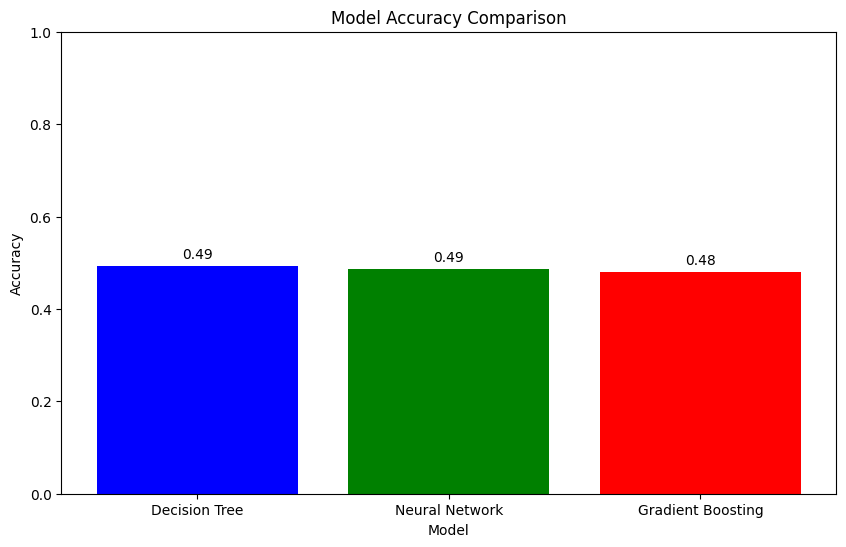

In [24]:
# Plotting the accuracies
models = ['Decision Tree', 'Neural Network', 'Gradient Boosting']
accuracies = [accuracy_tree, accuracy_nn, accuracy_boosting]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

In [25]:
# Plot ROC Curve for all models
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

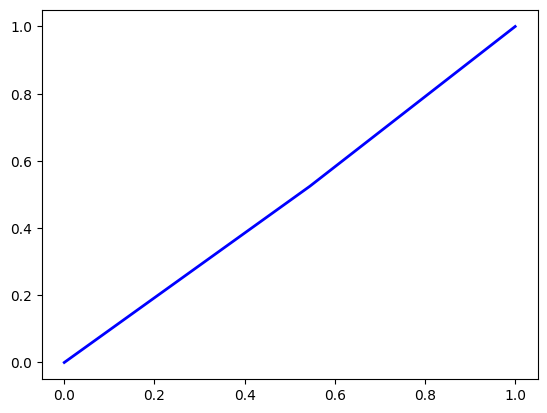

In [26]:
# Decision Tree ROC
y_pred_prob_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_prob_tree)
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')


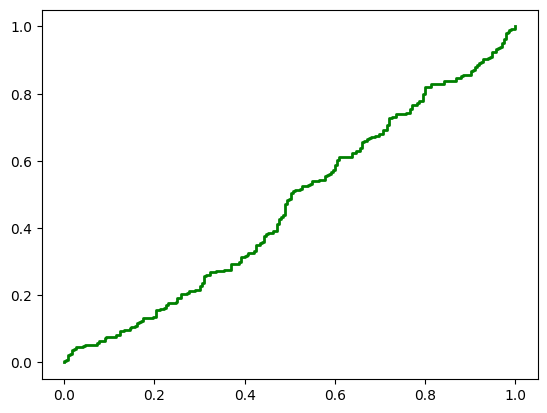

In [27]:
# Neural Network ROC
y_pred_prob_nn = nn_model.predict_proba(X_test_scaled)[:, 1]
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_prob_nn)
plt.plot(fpr_nn, tpr_nn, color='green', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')


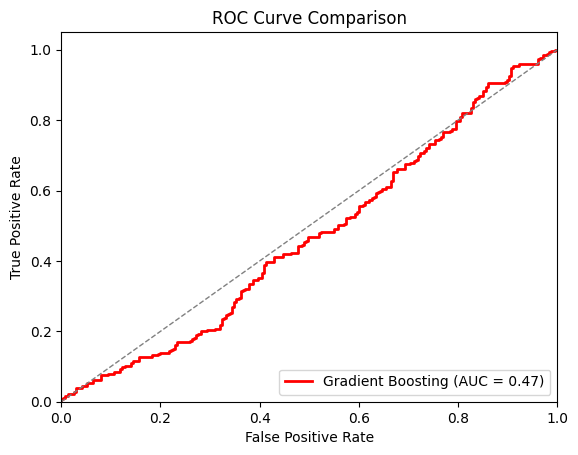

In [28]:
# Gradient Boosting ROC
y_pred_prob_boosting = boosting_model.predict_proba(X_test)[:, 1]
fpr_boosting, tpr_boosting, _ = roc_curve(y_test, y_pred_prob_boosting)
roc_auc_boosting = roc_auc_score(y_test, y_pred_prob_boosting)
plt.plot(fpr_boosting, tpr_boosting, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_boosting:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()